# Logistic regression

Let $\mathcal D = \{\boldsymbol x_i, y_i\}$, $y_i \in \{0, 1\}$.  **Logistic regression** model predicts the probability of the positive class:

$$
    \widehat y = \sigma(\boldsymbol x^{\mathsf T} \boldsymbol w) = \mathbb P(\boldsymbol x \in \text{class }1),
$$

where $\sigma(t) = \frac 1{1 + e^{-t}}$ — **sigmoid function**.


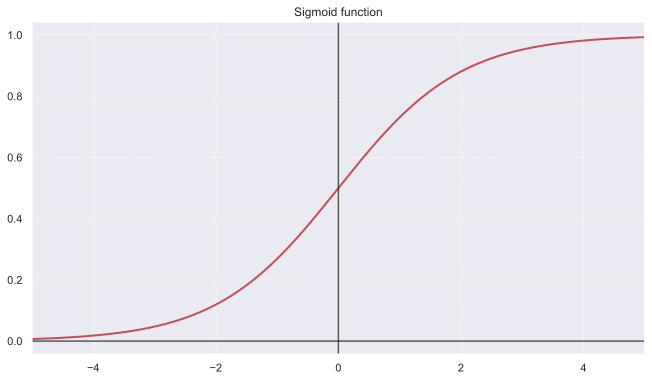

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import expit

%config InlineBackend.figure_formats = ['svg']

xs = np.linspace(-5, 5, num=401)
plt.plot(xs, expit(xs), c='r', lw=2)
plt.title("Sigmoid function")
plt.xlim(-5, 5)
plt.axhline(c="k", alpha=0.7)
plt.axvline(c="k", alpha=0.7)
plt.grid(ls=":");

<span style="display:none" id="sigmoid">W3sicXVlc3Rpb24iOiAiSWYgJ3gnIHZhbHVlIGlzIGxpbXggXHUyMTkyIFx1MjIxZSwgdGhlbiB3aGF0IHdpbGwgYmUgdGhlIG91dHB1dCBvZiB0aGUgc2lnbW9pZCBmdW5jdGlvbj8iLCAidHlwZSI6ICJtYW55X2Nob2ljZSIsICJhbnN3ZXJzIjogW3siYW5zd2VyIjogIjEiLCAiY29ycmVjdCI6IHRydWUsICJmZWVkYmFjayI6ICIifSwgeyJhbnN3ZXIiOiAiXHUyMjFlIiwgImNvcnJlY3QiOiBmYWxzZSwgImZlZWRiYWNrIjogIiJ9LCB7ImFuc3dlciI6ICIwLDUiLCAiY29ycmVjdCI6IGZhbHNlLCAiZmVlZGJhY2siOiAiIn0sIHsiYW5zd2VyIjogIjAuNjc2OCIsICJjb3JyZWN0IjogZmFsc2UsICJmZWVkYmFjayI6ICIifV19XQ==</span>

<span style="display:none" id="graphs">W3sicXVlc3Rpb24iOiAiV2hpY2ggb2YgdGhlc2UgZnVuY3Rpb25zIGlzIHNpZ21vaWQgZmlyc3QgZGVyaXZhdGl2ZSBmdW5jdGlvbj8iLCAidHlwZSI6ICJtYW55X2Nob2ljZSIsICJhbnN3ZXJzIjogW3siYW5zd2VyIjogImEpIiwgImNvcnJlY3QiOiBmYWxzZSwgImZlZWRiYWNrIjogIiJ9LCB7ImFuc3dlciI6ICJiKSIsICJjb3JyZWN0IjogZmFsc2UsICJmZWVkYmFjayI6ICIifSwgeyJhbnN3ZXIiOiAiYykiLCAiY29ycmVjdCI6IHRydWUsICJmZWVkYmFjayI6ICIifSwgeyJhbnN3ZXIiOiAiZCkiLCAiY29ycmVjdCI6IGZhbHNlLCAiZmVlZGJhY2siOiAiIn1dfV0=</span>

<span style="display:none" id="just_q">W3sicXVlc3Rpb24iOiAiV2hhdCBvcHRpbWl6ZXMgbG9naXN0aWMgcmVncmVzc2lvbiBtb2RlbCBwZXJmb3JtYW5jZT8iLCAidHlwZSI6ICJtYW55X2Nob2ljZSIsICJhbnN3ZXJzIjogW3siYW5zd2VyIjogIkZlYXR1cmUgU2NhbGluZyIsICJjb3JyZWN0IjogdHJ1ZSwgImZlZWRiYWNrIjogIiJ9LCB7ImFuc3dlciI6ICJSYW5kb20gaW5pdGlhbGl6YXRpb24iLCAiY29ycmVjdCI6IGZhbHNlLCAiZmVlZGJhY2siOiAiIn0sIHsiYW5zd2VyIjogIklnbm9yaW5nIG91dGxpZXJzIiwgImNvcnJlY3QiOiBmYWxzZSwgImZlZWRiYWNrIjogIiJ9LCB7ImFuc3dlciI6ICJBcHBseWluZyBjb21wbGV4IG1vZGVscyIsICJjb3JyZWN0IjogZmFsc2UsICJmZWVkYmFjayI6ICIifV19XQ==</span>

<span style="display:none" id="decision_b">W3sicXVlc3Rpb24iOiAiRGV0ZXJtaW5lIHRoZSB0aHJlc2hvbGQgYXQgd2hpY2ggdGhlIGNsYXNzaWZpY2F0aW9uIGFjY3VyYWN5IG9mIHRoZSBtb2RlbCB3aWxsIGJlIG1heGltdW0iLCAidHlwZSI6ICJudW1lcmljIiwgInByZWNpc2lvbiI6IDIsICJhbnN3ZXJzIjogW3sidHlwZSI6ICJ2YWx1ZSIsICJ2YWx1ZSI6IDAuNiwgImNvcnJlY3QiOiB0cnVlLCAiZmVlZGJhY2siOiAiQ29ycmVjdC4ifSwgeyJ0eXBlIjogImRlZmF1bHQiLCAiZmVlZGJhY2siOiAiVHJ5IGFnYWluLiJ9XX1d</span>

In [40]:
from jupyterquiz import display_quiz
display_quiz('#sigmoid')

<IPython.core.display.Javascript object>

**Q**. What is $\sigma'(t)$?

```{admonition} Answer
:class: tip, dropdown
$$
\sigma'(t) = \frac{e^{-t}}{(1+e^{-t})^2} = \sigma(t) (1-\sigma(t))
$$
```
The linear output $\boldsymbol x^{\mathsf T} \boldsymbol w$ is also called **logit**.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


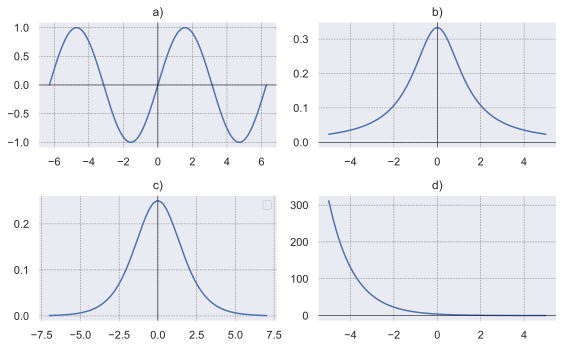

In [8]:
import numpy as np
import matplotlib.pyplot as plt
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Generate x values
x_values = np.linspace(-2 * np.pi, 2 * np.pi, 1000)

# Calculate corresponding y values for sin(x)
y_values_sin = np.sin(x_values)

# Define the function
def my_function(x):
    return 1/(3+(x**2))

# Generate x values
x_values_k = np.linspace(-5, 5, 1000)

# Compute corresponding y values
y_values_k = my_function(x_values)

# Generate x values for sigmoid function
x_values_sigmoid = np.linspace(-7, 7, 1000)

# Calculate corresponding y values for the first derivative of sigmoid
y_values_sigmoid_derivative = sigmoid_derivative(x_values_sigmoid)

# Define the function
def my_function(x):
    return 4 / (2**x)

# Generate x values
x_values_nu = np.linspace(-5, 5, 1000)

# Compute corresponding y values
y_values_nu = my_function(x_values)


# Plot the graphs in a 2x2 grid
plt.figure(figsize=(8, 5))

# Plot sin(x)
plt.subplot(2, 2, 1)
plt.plot(x_values, y_values_sin)
plt.title('a)')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# Plot cos(x)
plt.subplot(2, 2, 2)
plt.plot(x_values_k, y_values_k)
plt.title('b)')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# Plot sigmoid function and its derivative
plt.subplot(2, 2, 3)
plt.plot(x_values_sigmoid, y_values_sigmoid_derivative)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.title('c)')
plt.legend()

# Plot 
plt.subplot(2, 2, 4)
plt.plot(x_values_nu, y_values_nu)
plt.title('d)')
plt.axhline(0, color='black', linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# Adjust layout
plt.tight_layout()

plt.show()

In [35]:
display_quiz('#graphs')

<IPython.core.display.Javascript object>

## Decision Boundary

![Alt text](assets/decision_boundary.png)

The decision boundary in classification algorithms is the hypersurface that delineates the input space into regions assigned to different classes. For a binary classification with classes labeled as $0$ and $1$, the decision boundary in a general form is defined by:

$$
\boldsymbol{x}^{\mathsf T} \boldsymbol{w} + b = c,
$$

where $\boldsymbol{x}$ represents input features, $\boldsymbol{w}$ is the weight vector, $b$ is the bias, and $c$ is a constant that adjusts the position of the boundary. The class of a new observation is determined by the sign of $\boldsymbol{x}^{\mathsf T} \boldsymbol{w} + b - c$.

## Decision Boundary in Logistic Regression

In logistic regression, the decision boundary depends on the chosen threshold $\theta$ for classification. The model predicts the probability of an observation belonging to the positive class. The decision boundary occurs where this predicted probability equals the threshold:

$$
\sigma(\boldsymbol{x}^{\mathsf T} \boldsymbol{w}) = \theta,
$$

where $\sigma(t)$ is the sigmoid function. The equation of the decision boundary, taking the threshold into account, is obtained by setting the sigmoid function equal to \$\theta$ and solving for $\boldsymbol{x}^{\mathsf T} \boldsymbol{w}$:

$$
\boldsymbol{x}^{\mathsf T} \boldsymbol{w} = \ln\left(\frac{\theta}{1-\theta}\right).
$$

This equation represents a linear decision boundary in the feature space, which varies with the chosen threshold $\theta$. For the commonly used threshold of 0.5, this simplifies to $\boldsymbol{x}^{\mathsf T} \boldsymbol{w} = 0$, as mentioned in the original content.

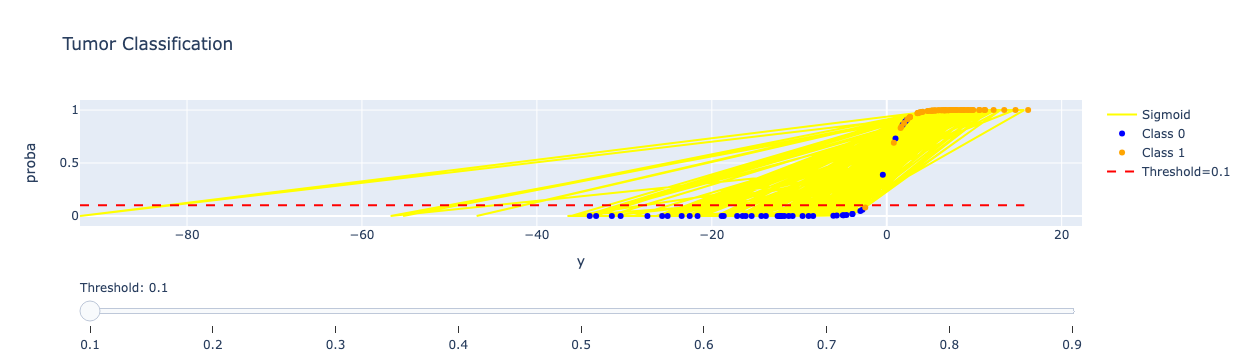

In [33]:
# Загружаем набор данных
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()

# transforming numpy array into dataframe
df = pd.DataFrame(np.c_[dataset['data'], dataset['target']], columns=np.append(dataset['feature_names'], ['target']))
df['target'] = df['target'].astype('int')

#df.head(10)

# ------------------------------------------------------------------------------------------------------------------------------

from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2)
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='target'), df['target'], 
                                                    test_size=0.2, 
                                                    random_state=1, 
                                                    stratify=df['target'])

# ------------------------------------------------------------------------------------------------------------------------------
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=3000)
log_reg.fit(X_train.to_numpy(), y_train.to_numpy())

coef = log_reg.coef_[0]
intercept = log_reg.intercept_
coef, intercept


def sigmoid(y):
    return 1/(1 + np.exp(-y))


y_hat_train = np.dot(X_train, coef) + intercept
proba_train = sigmoid(y_hat_train)

y_hat_test = np.dot(X_test, coef) + intercept
proba_test = sigmoid(y_hat_test)


import plotly.graph_objects as go
from sklearn.metrics import accuracy_score

fig = go.Figure()

# Add the sigmoid line
fig.add_trace(go.Scatter(x=y_hat_train, y=proba_train, mode='lines', name='Sigmoid', line=dict(color='yellow')))

# Add scatter plots for test data
fig.add_trace(go.Scatter(x=y_hat_test[y_test==0], y=proba_test[y_test==0], mode='markers', name='Class 0', marker=dict(color='blue')))
fig.add_trace(go.Scatter(x=y_hat_test[y_test==1], y=proba_test[y_test==1], mode='markers', name='Class 1', marker=dict(color='orange')))

# Add threshold lines and calculate accuracy for each threshold
thresholds = np.linspace(0.1, 0.9, 9)
accuracies = []
for threshold in thresholds:
    # Add threshold line
    fig.add_trace(go.Scatter(x=[min(y_hat_train), max(y_hat_train)], y=[threshold, threshold], mode='lines', name=f'Threshold={threshold}', line=dict(color='red', dash='dash'), visible=False))

    # Calculate accuracy
    predictions = proba_test >= threshold
    accuracy = accuracy_score(y_test, predictions)
    accuracies.append(accuracy)

# Update layout
fig.update_layout(title='Tumor Classification', xaxis_title='y', yaxis_title='proba')

# Add slider
slider_steps = []
for i, (threshold, accuracy) in enumerate(zip(thresholds, accuracies)):
    step = dict(
        method='update',
        args=[{'visible': [True, True, True] + [threshold == t for t in thresholds]},
              {'title': f'Tumor Classification (Threshold={threshold}, Accuracy={accuracy:.2f})'}],
        label=f'{threshold:.1f}'
    )
    slider_steps.append(step)

fig.update_layout(
    sliders=[{
        'active': 0,
        'currentvalue': {"prefix": "Threshold: "},
        'pad': {"t": 50},
        'steps': slider_steps
    }]
)

# Show the initial threshold line
fig.data[3].visible = True

# Show the plot
fig.show()

In [41]:
display_quiz('#decision_b')

<IPython.core.display.Javascript object>

### Interpreting the Weights

The weights \($\boldsymbol{w}$\) in logistic regression represent the influence of each feature on the prediction. They are interpreted as follows:


- **Positive Weights $w_j > 0$**: Increase the probability of the positive class as the feature value $x_j$ increases.
- **Negative Weights $w_j < 0$**: Decrease the probability of the positive class as the feature value $x_j$ increases.
- **Magnitude of Weights $|w_j|$**: Indicates the strength of the feature's influence on the prediction.


The probability of the positive class given the features \($\boldsymbol{x}$\) and weights \($\boldsymbol{w}$\) is computed as:

$$
P(y = 1|\boldsymbol{x}; \boldsymbol{w}) = \sigma(\boldsymbol{x}^{\mathsf T} \boldsymbol{w}) = \frac{1}{1 + e^{-\boldsymbol{x}^{\mathsf T} \boldsymbol{w}}}.
$$

From this, the log-odds, or the logarithm of the odds ratio, is given by:

$$
\log \left( \frac{P(y = 1|\boldsymbol{x}; \boldsymbol{w})}{1 - P(y = 1|\boldsymbol{x}; \boldsymbol{w})} \right) = \boldsymbol{x}^{\mathsf T} \boldsymbol{w}.
$$

This formula illustrates the direct relationship between feature values, weights, and the predicted probability, emphasizing the linear nature of the decision-making process in logistic regression.

In [9]:
display_quiz('#just_q')

<IPython.core.display.Javascript object>

## Loss Function

The loss function is binary cross-entropy

```{math}
:label: bin-log-reg-loss
    \begin{multline*}
    \mathcal L(\boldsymbol w) = -\frac 1n\sum\limits_{i=1}^n \big(y_i \log \widehat y_i + (1-y_i)\log(1-\widehat y_i)\big) = \\
    =-\frac 1n\sum\limits_{i=1}^n \big(y_i \log(\sigma(\boldsymbol x_i^{\mathsf T} \boldsymbol w)) + (1- y_i)\log(1 - \sigma(\boldsymbol x_i^{\mathsf T} \boldsymbol w))\big).
    \end{multline*}
```



````{admonition} Question
:class: important
How will the cross entropy loss change if $\mathcal Y = \{-1, 1\}$?

```{admonition} Answer
:class: tip, dropdown
In this case

$$
    \mathbb P(\boldsymbol x \in \text{class }1) = \sigma(\boldsymbol x^{\mathsf T} \boldsymbol w), \quad \mathbb P(\boldsymbol x \in \text{class }-1) = \sigma(-\boldsymbol x^{\mathsf T} \boldsymbol w).
$$

Hence,

$$
\begin{multline*}
\mathcal L(\boldsymbol w) = -\frac 1n\sum\limits_{i=1}^n [y_i = 1] \log\sigma(\boldsymbol x_i^{\mathsf T} \boldsymbol w) + [y_i = -1] \log\sigma(-\boldsymbol x_i^{\mathsf T} \boldsymbol w)
= \\
= -\frac 1n\sum\limits_{i=1}^n \log \sigma(y_i \boldsymbol x_i^{\mathsf T} \boldsymbol w) =
\frac 1n\sum\limits_{i=1}^n \log \big(1 + e^{y_i \boldsymbol x_i^{\mathsf T} \boldsymbol w}\big).
\end{multline*}
$$
```
````


## Regularization


### $L_1$ and $L_2$
The loss function for $L_2$-regularized logistic regression with is $\mathcal Y = \{-1, 1\}$

$$
\mathcal L(\boldsymbol w) = \frac 1n\sum\limits_{i=1}^n \log \big(1 + e^{y_i \boldsymbol x_i^{\mathsf T} \boldsymbol w}\big) + C \boldsymbol w^{\mathsf T} \boldsymbol w.
$$

````{admonition} Question
:class: important
How will the loss change if $\mathcal Y = \{0, 1\}$?

```{admonition} Answer
:class: tip, dropdown

$$
\mathcal{L}(\boldsymbol{w}) = -\frac{1}{n} \sum_{i=1}^{n} \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right] + C \sum_{j=1}^{p} w_j^2,
$$
```
````


The loss function for logistic regreesion with $L_1$ regularization and $\mathcal Y = \{0, 1\}$:

$$
\mathcal L(\boldsymbol w) = \frac 1n\sum\limits_{i=1}^n \log \big(1 + e^{-y_i \boldsymbol x_i^{\mathsf T} \boldsymbol w}\big) + C \sum_{j=1}^{n} |w_j|,
$$

where $C$ is the regularization strength, $w_j$ are the coefficients of the model, $\boldsymbol x_i$ are the input features, and $y_i$ are the class labels. The $L_1$ regularization promotes sparsity in the model coefficients, potentially leading to some coefficients being exactly zero.



### Elastic Net Loss Function

For logistic regression with Elastic Net regularization, the loss function combines both L1 and L2 penalty terms. The Elastic Net loss function is given by:

$$
\mathcal L(\boldsymbol w) = \frac 1n\sum\limits_{i=1}^n \log \big(1 + e^{-y_i \boldsymbol x_i^{\mathsf T} \boldsymbol w}\big) + \lambda \left( \alpha \sum_{j=1}^{n} |w_j| + \frac{1-\alpha}{2} \sum_{j=1}^{n} w_j^2 \right),
$$

where $\alpha$ is the mixing parameter that balances the L1 and L2 penalties, $\lambda$ is the overall regularization strength, $w_j$ are the coefficients of the model, $ \boldsymbol x_i$ are the input features, and $y_i$ are the class labels. Elastic Net regularization is particularly useful when there are highly correlated variables in the dataset.

In [37]:
display_quiz('#just_q')

<IPython.core.display.Javascript object>

## Example: breast cancer dataset

This is a dataset with $30$ features and binary target.

In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
data['data'].shape, data['target'].shape

((569, 30), (569,))

Malignant or benign?

In [3]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [4]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

Divide the dataset into train and test:

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2)

Now take the logistic regression from `sklearn`:

In [6]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

/Users/yerassyl/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

The default value of `max_iter` is $100$, and here it is not enough for convergence. However, accuracy is not bad:

In [7]:
print("Train accuracy:", log_reg.score(X_train, y_train))
print("Test accuracy:", log_reg.score(X_test, y_test))

Train accuracy: 0.9318681318681319
Test accuracy: 0.9473684210526315


Now increase `max_iter` argument:

In [8]:
log_reg = LogisticRegression(max_iter=3000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=3000)

The improvement of accuracy seems not to be significant:

In [9]:
print("Train accuracy:", log_reg.score(X_train, y_train))
print("Test accuracy:", log_reg.score(X_test, y_test))

Train accuracy: 0.9604395604395605
Test accuracy: 0.956140350877193
